# Tabel of Contents

1) import libraries and data

2) wrangle /derive needed time data

3) determine time frame to analyze

4) plot time data

5) decompose time data

6) test for stationarity

7) test for auto correlation

9) difference data for stationarity

10) log data to achieve stationarity

11) bonus task:forecasting data

a) selecting parameters

b) splitting data

12 exporting data

### 1
import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate a suspended library or feature
plt.style.use('fivethirtyeight') # styling option for how plots will appear

In [2]:
#define path
path = r'C:\Users\Owner\Documents\Career Foundry\Tasks\Data Immersion Tasks\Traffic Project\Data'

In [3]:
#import data
traffic = pd.read_csv(os.path.join(path, 'Prepared', 'v5_data_post_clustering.csv'))

In [4]:
pd.options.display.max_columns = None
traffic.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,start_date,start_time,time_of_day,acdnt_per_day,state,avg_state_sev,avg_state_temp,avg_state_rain,avg_state_acdnt_per_day,start_time_float,clusters
0,0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-05-21,08:29:55,Morning,1693,South Carolina,2.172651,64.663102,0.006040,64.104680,8.498611,0
1,1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-07,17:43:09,Evening,2450,North Carolina,2.147315,63.247137,0.006803,67.104506,17.719167,0
2,2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2020-12-13,21:53:00,Night,5467,California,2.182810,64.206544,0.003010,361.961450,21.883333,1
3,3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,2018-04-17,16:51:23,Evening,1626,Nevada,2.346195,62.241654,0.001130,4.816372,16.856389,2
4,4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,2016-08-31,17:40:49,Evening,1250,Florida,2.238960,74.721026,0.008045,147.670296,17.680278,3


In [5]:
#drop added index colum
traffic = traffic.drop(columns = 'Unnamed: 0')

In [6]:
traffic.shape

(2543663, 51)

## 2
wrangle /derive needed time data

In [7]:
#update column of count of accidents by day to use as dependant variable for time series
traffic['acdnt_per_day'] = traffic.groupby(['start_date'])['start_date'].transform('count')

In [8]:
traffic.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,start_date,start_time,time_of_day,acdnt_per_day,state,avg_state_sev,avg_state_temp,avg_state_rain,avg_state_acdnt_per_day,start_time_float,clusters
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,29607-6027,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-05-21,08:29:55,Morning,1667,South Carolina,2.172651,64.663102,0.006040,64.104680,8.498611,0
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,28270-8560,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-07,17:43:09,Evening,2436,North Carolina,2.147315,63.247137,0.006803,67.104506,17.719167,0
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,95033,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,2020-12-13,21:53:00,Night,5335,California,2.182810,64.206544,0.003010,361.961450,21.883333,1
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,89705,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,2018-04-17,16:51:23,Evening,1595,Nevada,2.346195,62.241654,0.001130,4.816372,16.856389,2
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,33324,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,0.0,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,2016-08-31,17:40:49,Evening,1225,Florida,2.238960,74.721026,0.008045,147.670296,17.680278,3


In [9]:
#create dataframe of date and count of accidents
date_acdnt_count = traffic[['start_date', 'acdnt_per_day']]

In [10]:
date_acdnt_count.shape

(2543663, 2)

In [11]:
date_acdnt_count.head()

,start_date,acdnt_per_day
0,2019-05-21,1667
1,2019-10-07,2436
2,2020-12-13,5335
3,2018-04-17,1595
4,2016-08-31,1225


In [12]:
#expecting duplicates but checking to see how many
dups = date_acdnt_count.duplicated()
dups.sum()

2541878

In [13]:
#remove duiplicates and create new dataframe date_count
date_count = date_acdnt_count.drop_duplicates()

In [14]:
date_count.shape

(1785, 2)

In [15]:
#check to make sure 1785 days is expected
date_min = date_acdnt_count['start_date'].min()
date_min = pd.to_datetime(date_min)
date_max = date_acdnt_count['start_date'].max()
date_max = pd.to_datetime(date_max)

difference = (date_max - date_min)

print(difference)

1788 days 00:00:00


In [16]:
#check number of unique values in date_acdnt_count columns
date_acdnt_count.nunique()

start_date       1785
acdnt_per_day    1244
dtype: int64

3 days in the time frame appear to not have any accidents

In [17]:
#reset the date as the index of date_count

from datetime import datetime

date_count['date'] = pd.to_datetime(date_count['start_date'])
date_count = date_count.set_index('date')
date_count.drop(['start_date'], axis = 1 , inplace = True)

In [18]:
#sort the date_count dataframe to be in chronological order
date_count.sort_index(ascending = True, inplace = True)

In [19]:
#check for any missing values
date_count.isnull().sum()

acdnt_per_day    0
dtype: int64

## 3
determine time frame to analyze

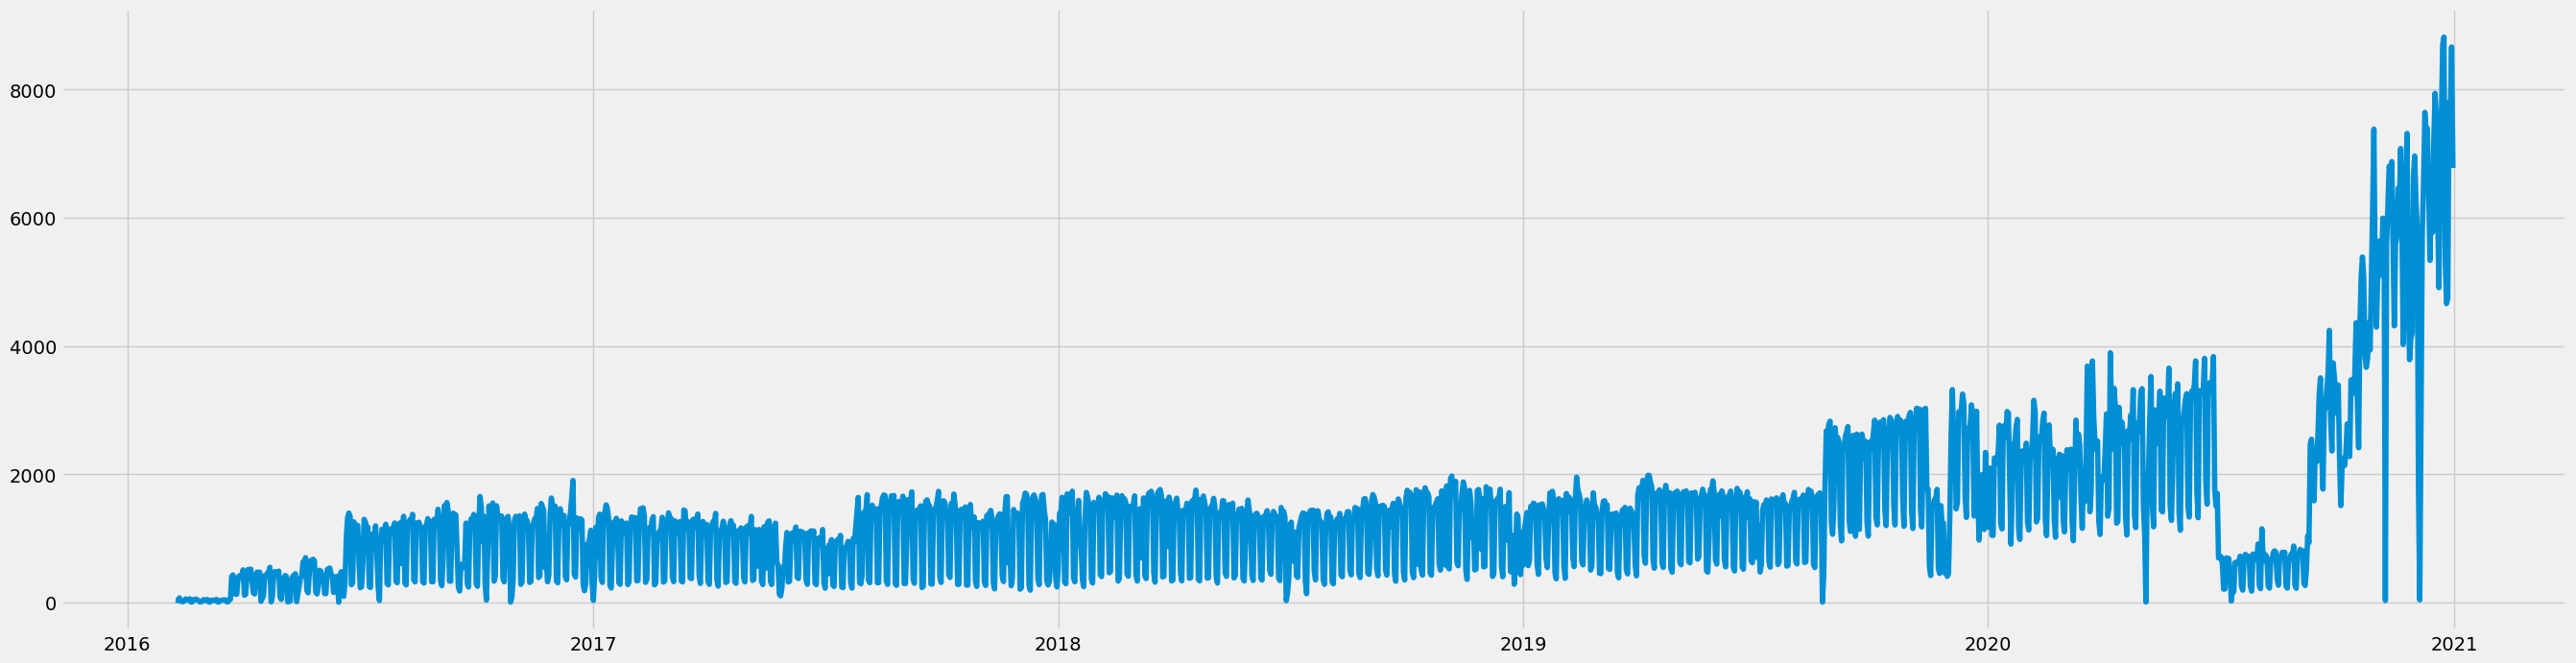

In [20]:
#plot the time vs count of accidents line for date_count to get view of all data

plt.figure(figsize = (30,8), dpi = 100)

plt.plot(date_count)

In [21]:
print('date_min', date_min)
print('date_max', date_max)

date_min 2016-02-08 00:00:00
date_max 2020-12-31 00:00:00


Time range looks like a good amount of traffic for the immediate past few years. Will keep entire range. But I will take a month long subset to plot in 2018 to try and get a feel for the variations in the data up and down.

In [22]:
#reset index of date_count
data_reset_sub = date_count.reset_index()

In [23]:
#create subset of data for june of 2018
date_count_june_2018 = data_reset_sub.loc[(data_reset_sub['date'] >= '2018-06-01')&(data_reset_sub['date'] < '2018-07-01')]

In [24]:
#reset date as index
date_count_june_2018['date_time'] = pd.to_datetime(date_count_june_2018['date'])
date_count_june_2018 = date_count_june_2018.set_index('date_time')
date_count_june_2018.drop(columns = 'date', inplace = True)

## 4
plot time data

In [25]:
#smooth data by creating a moving average of 30 days for overall data set date_count

data = date_count['acdnt_per_day']
window_size = 30

data_series = pd.Series(data)
windows = data_series.rolling(window_size)
moving_average = windows.mean()

moving_average_list = moving_average.tolist()

In [26]:
#check length of list
len(moving_average_list)

1785

In [27]:
#add moving average to date_count
date_count['30_day_avg'] = moving_average_list

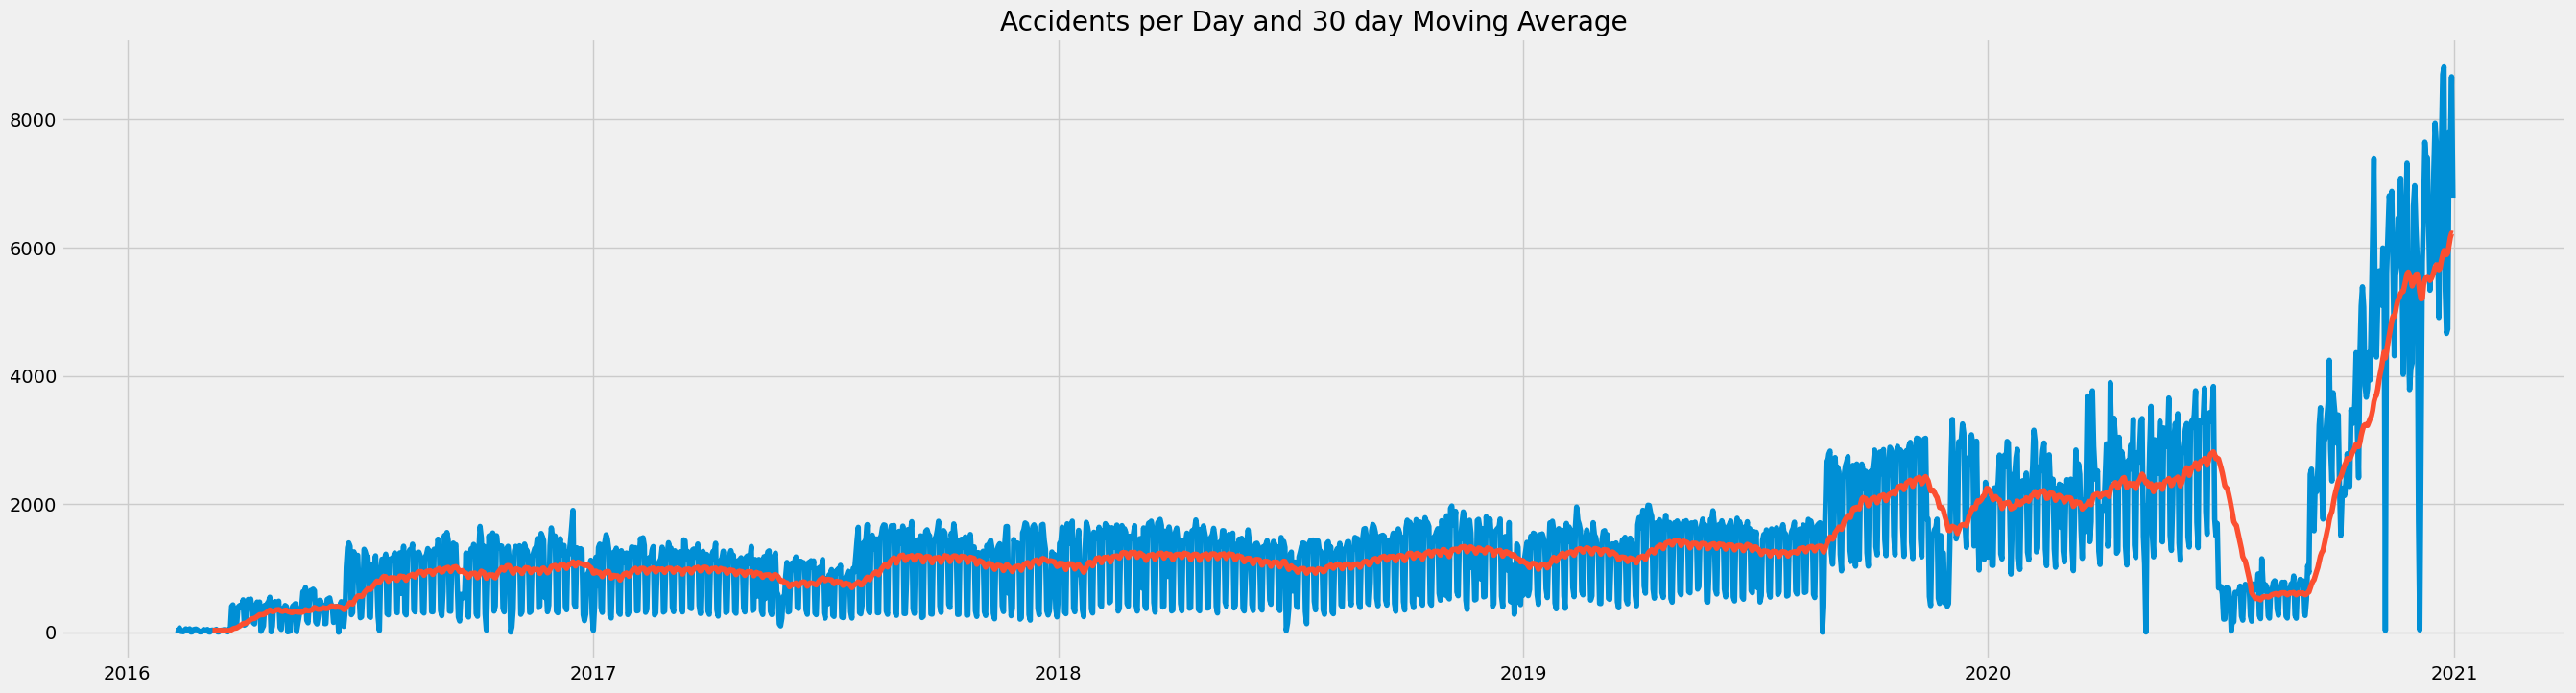

In [28]:
#plot data with 20 day average
plt.figure(figsize = (30,8), dpi = 100)
plt.title('Accidents per Day and 30 day Moving Average')

plt.plot(date_count)

In [29]:
#smooth data by creating a moving average of 7 days for subset date_count_june_2018
datasub = date_count_june_2018['acdnt_per_day']
window_size_sub = 7

data_series_sub = pd.Series(datasub)
windows_sub = data_series_sub.rolling(window_size_sub)
moving_average_sub = windows_sub.mean()

moving_average_list_sub = moving_average_sub.tolist()

In [30]:
#check length of list
len(moving_average_list_sub)

30

In [31]:
#add moving average to date_count_june_2018
date_count_june_2018['7_day_avg'] = moving_average_list_sub

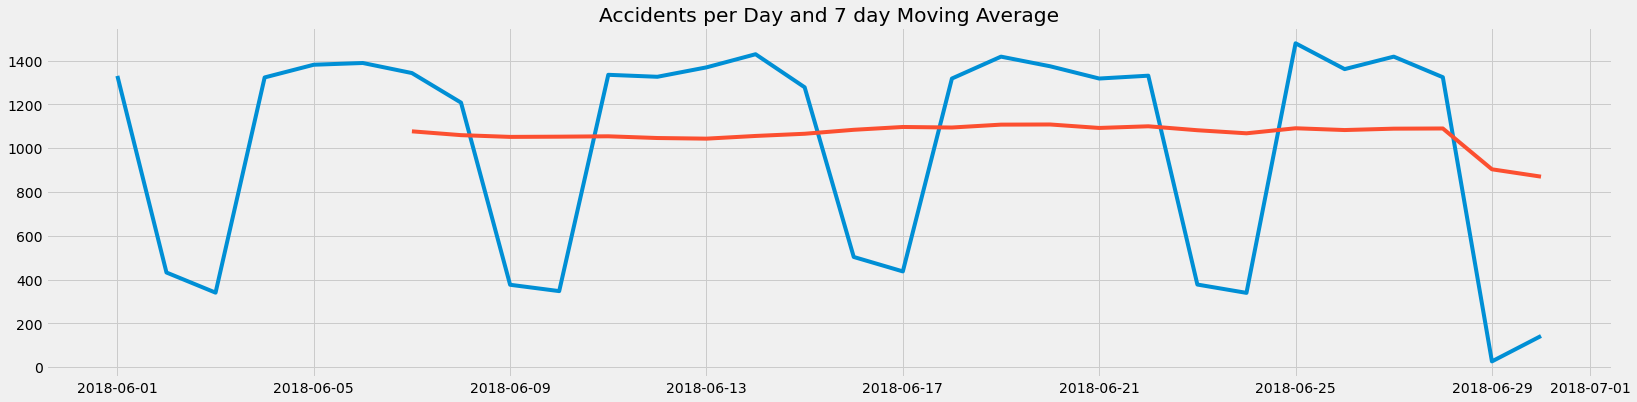

In [32]:
#plot subset data with 7 day average
plt.figure(figsize = (25,6))
plt.title('Accidents per Day and 7 day Moving Average')

plt.plot(date_count_june_2018)

In [33]:
date_count_june_2018[date_count_june_2018['acdnt_per_day'] < 1000]

,acdnt_per_day,7_day_avg
date_time,,
2018-06-02,432,NaN
2018-06-03,340,NaN
2018-06-09,376,1051.428571
2018-06-10,347,1052.428571
2018-06-16,503,1083.857143
2018-06-17,437,1096.714286
2018-06-23,377,1081.857143
2018-06-24,339,1067.857143
2018-06-29,26,903.428571


The lowest points in the month are consistently the 2 weekend days of Saturday and Sunday. This pattern is a weekly seasonality.

## 5
decompose time data

In [34]:
#remove moving average from date count
date_count.drop(columns = '30_day_avg', inplace = True)

In [35]:
#split data into time components with a monthly frequency
decomposition = sm.tsa.seasonal_decompose(date_count.asfreq('M'), model='additive')

In [36]:
#define a fixed size for the following plots
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

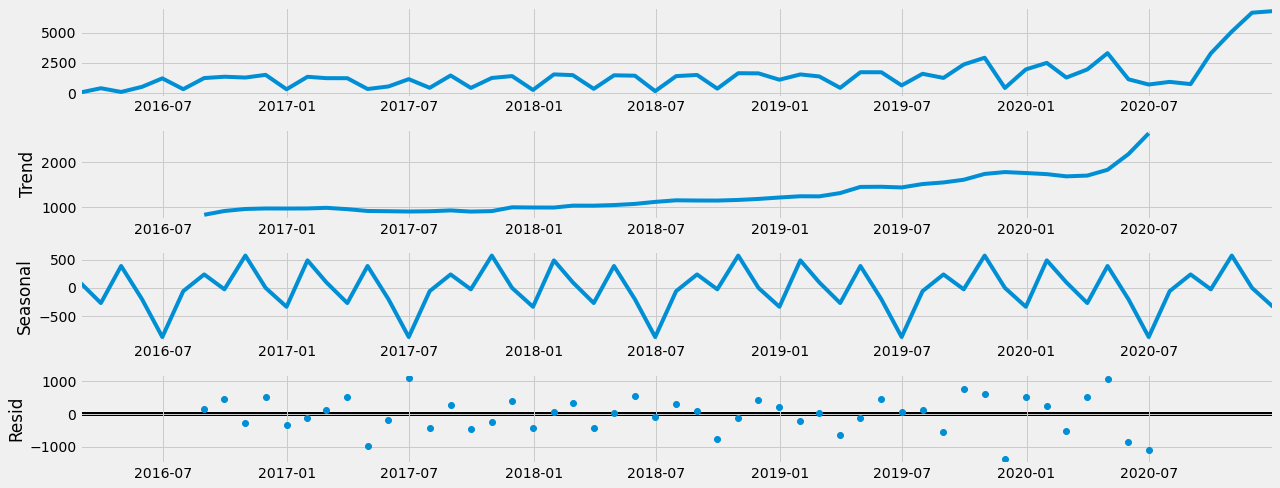

In [37]:
decomposition.plot()
plt.show()

Trend: The series does look to have an upward trend. Counts of accidents by time period are increasing as time goes on.

Seasonality: There looks to be literal seasonal differences that repeat. Mid summer(July) looks to have the largest drop in accidents. Winter (New Year) has the 2nd highest drop. Fall and Spring are 3rd and 4th in terms of drop size respectively.

Residual/ Noise: There looks to be outlier values that for the most part appear to match the seasonality drops. I would suspect there are holidays or days of largely increased travel.

## 6
test for stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller

#define dickey fuller test
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 
                                        'p-value', 
                                        'Num of Lags Used',
                                        'Num of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

Null Hypothesis: A unit root is present ( data is non stationary)
Alternative Hypothesis: A unit root is NOT present ( data is stationary)

In [39]:
#apply dickey fuller test to date_count data
dickey_fuller(date_count['acdnt_per_day'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.024059
p-value                        0.994513
Num of Lags Used              25.000000
Num of Observations Used    1759.000000
Critical Value (1%)           -3.434073
Critical Value (5%)           -2.863185
Critical Value (10%)          -2.567645
dtype: float64


Test statistic(1.02) is larger that all 3 crticial value options (-3.4, -2.9, -2.6). Unable to disprove null hypothesis. Data is non stationary.

## 7
test for auto correlation

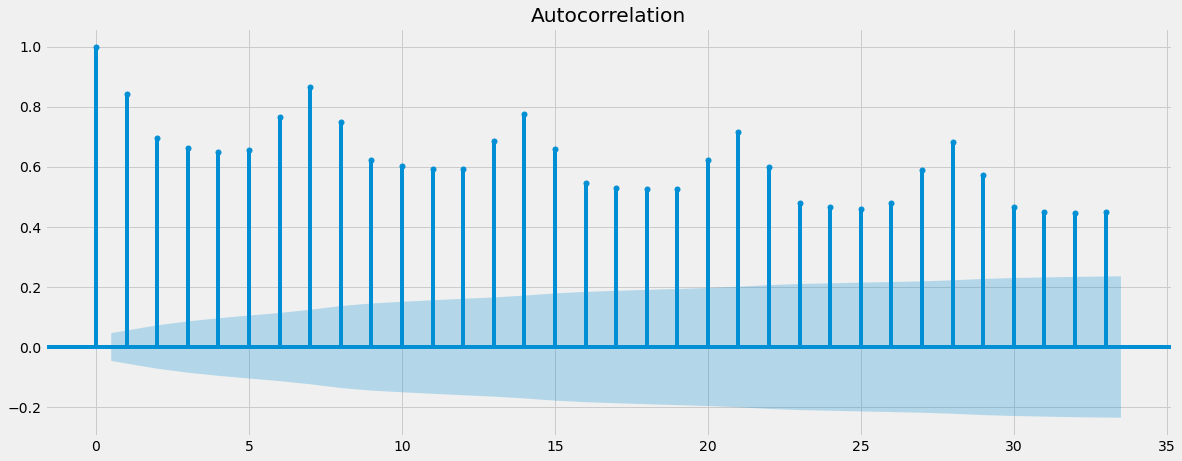

In [40]:
#mapping lag differences in date_count
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(date_count)
plt.show()

Every vertical line is outside confidence intervals. Further confirms dickey fuller test that data is non stationary.

## 9
difference data for stationarity

In [41]:
#transform data from date_count using differencing

date_count_diff_1 = date_count-date_count.shift(1)
date_count_diff_1.dropna(inplace= True)

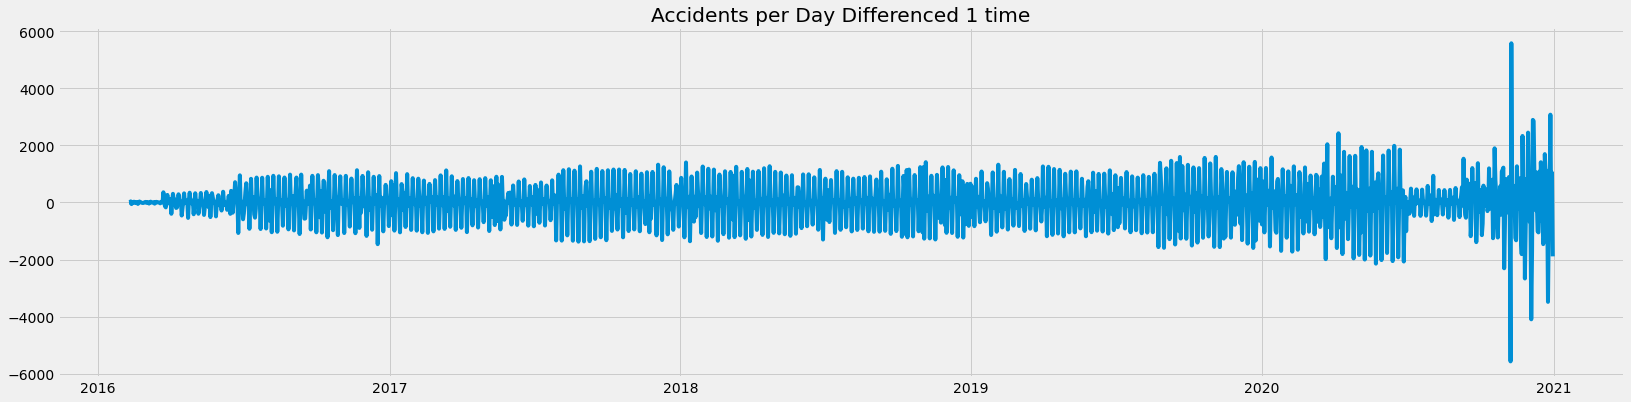

In [42]:
#re plot the data date_count after 1 round of differencing
plt.figure(figsize = (25,6))
plt.title('Accidents per Day Differenced 1 time')

plt.plot(date_count_diff_1)

In [43]:
#retest dickey fuller after 1 round of differencing
dickey_fuller(date_count_diff_1['acdnt_per_day'])

Dickey-Fuller Stationarity test:
Test Statistic             -1.198870e+01
p-value                     3.562836e-22
Num of Lags Used            2.500000e+01
Num of Observations Used    1.758000e+03
Critical Value (1%)        -3.434075e+00
Critical Value (5%)        -2.863185e+00
Critical Value (10%)       -2.567646e+00
dtype: float64


Test statistic(-11.9) is smaller that all 3 crticial value options (-3.4, -2.9, -2.6). 
Can disprove null hypothesis. Data is stationary.

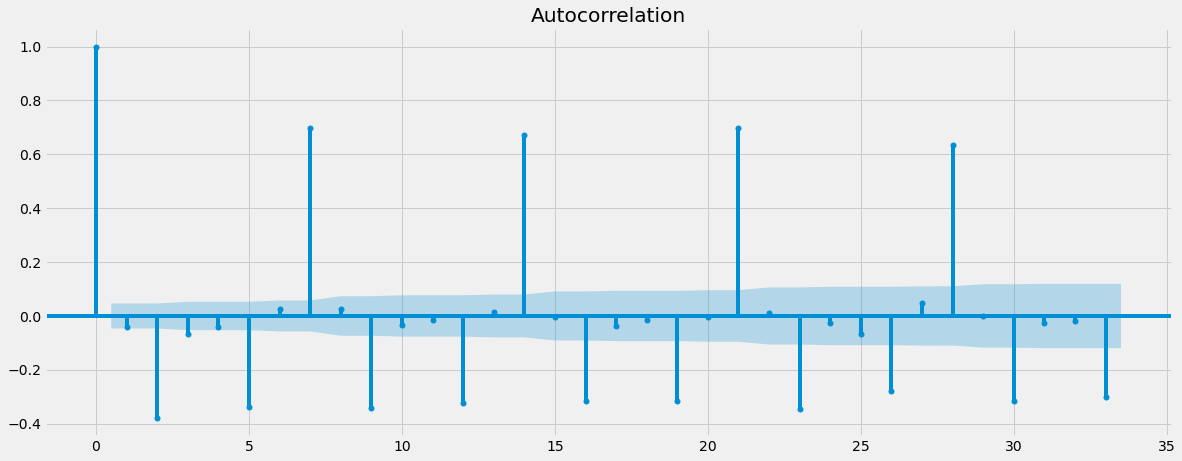

In [44]:
#mapping lag differences to confirm stationarity after 1 round of differencing
plot_acf(date_count_diff_1)
plt.show()

Still a large amount (15)of lines outside the confidence intervals.

In [45]:
#transform data 2nd time using differencing

date_count_diff_2 = date_count_diff_1-date_count_diff_1.shift(1)
date_count_diff_2.dropna(inplace= True)

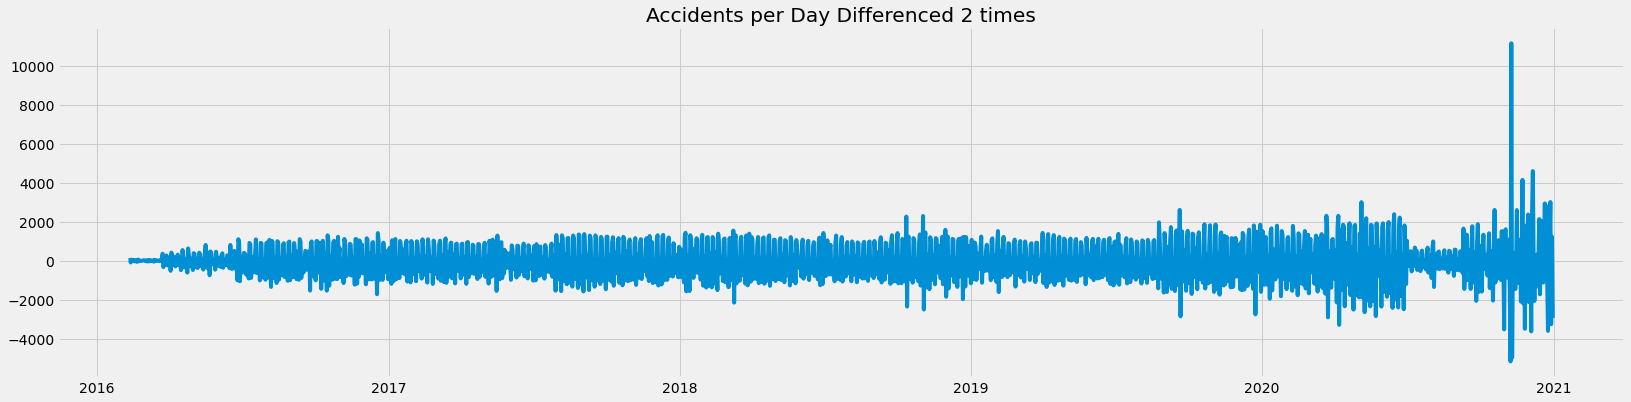

In [46]:
#re plot the data after 2nd round of differencing
plt.figure(figsize = (25,6))
plt.title('Accidents per Day Differenced 2 times')

plt.plot(date_count_diff_2)

In [47]:
#retest dickey fuller after 2 rounds of differencing
dickey_fuller(date_count_diff_2['acdnt_per_day'])

Dickey-Fuller Stationarity test:
Test Statistic             -1.320134e+01
p-value                     1.092895e-24
Num of Lags Used            2.500000e+01
Num of Observations Used    1.757000e+03
Critical Value (1%)        -3.434077e+00
Critical Value (5%)        -2.863186e+00
Critical Value (10%)       -2.567646e+00
dtype: float64


Test statistic(-13.2) is again smaller that all 3 crticial value options (-3.4, -2.9, -2.6). Can disprove null hypothesis. Data is stationary.

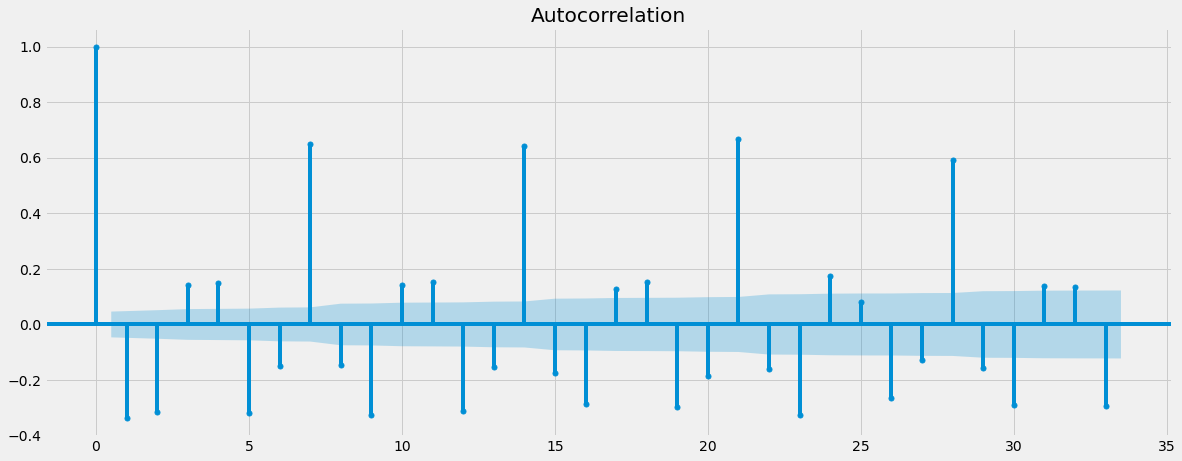

In [48]:
#mapping lag differences to confirm stationarity after 2 rounds of differencing
plot_acf(date_count_diff_2)
plt.show()

Now there is only a single line inside the confidence intervals. 2nd round of differencing looks less stationary than the 1st round.

In [49]:
# 3rd round of differencing
date_count_diff_3 = date_count_diff_2 - date_count_diff_2.shift(1)
date_count_diff_3.dropna(inplace = True)

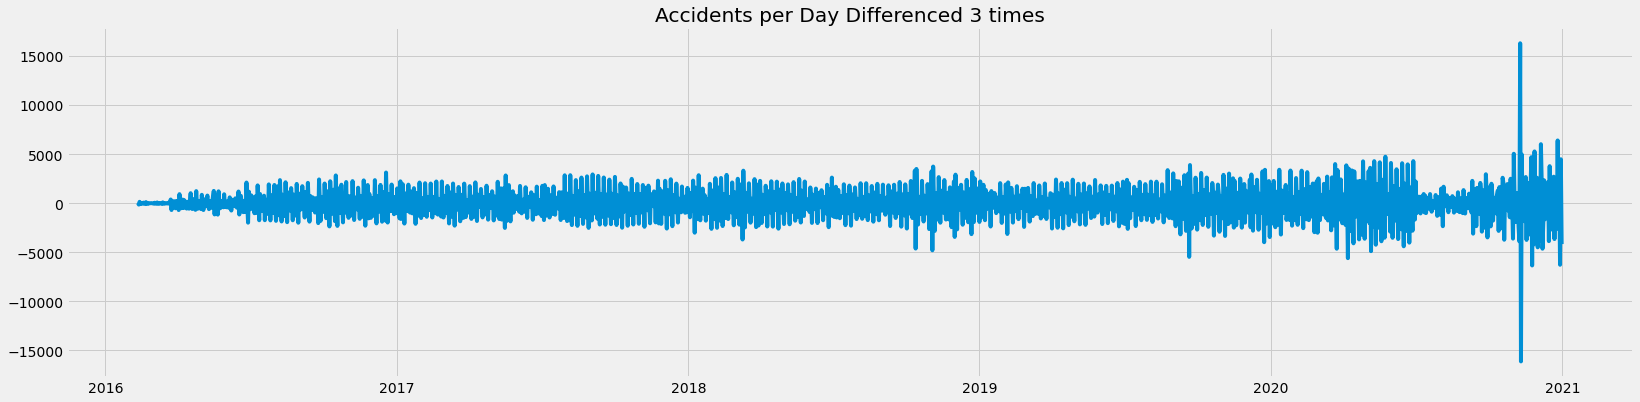

In [50]:
#re plot the data after 3rd round of differencing
plt.figure(figsize = (25,6))
plt.title('Accidents per Day Differenced 3 times')

plt.plot(date_count_diff_3)

In [51]:
#retest dickey fuller after 3 rounds of differencing
dickey_fuller(date_count_diff_3['acdnt_per_day'])

Dickey-Fuller Stationarity test:
Test Statistic               -21.330580
p-value                        0.000000
Num of Lags Used              24.000000
Num of Observations Used    1757.000000
Critical Value (1%)           -3.434077
Critical Value (5%)           -2.863186
Critical Value (10%)          -2.567646
dtype: float64


Test statistics at -21.3 is much less than all the critical values at 1%(-3.4), 5%(-2.9), and 10% (-2.6)

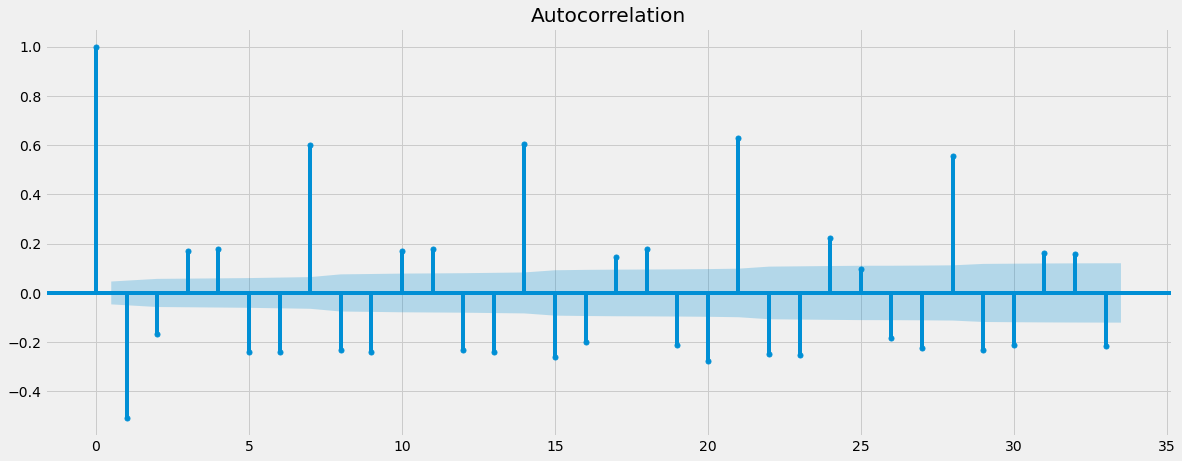

In [52]:
#mapping lag differences to confirm stationarity after 3 rounds of differencing
plot_acf(date_count_diff_3)
plt.show()

Now there is still only 1 line inside the confidence intervals. 3rd round of differencing looks less stationary than the 2nd round.

## 10 
Log data for stationarity

In [53]:
#will try taking natural log value of count of accidents to test another method
date_count_log1 = date_count
date_count_log1['acdnt_per_day_log'] = np.log(date_count['acdnt_per_day'])

In [54]:
#drop the count per day column
date_count_log1 = date_count_log1.drop(columns = 'acdnt_per_day')

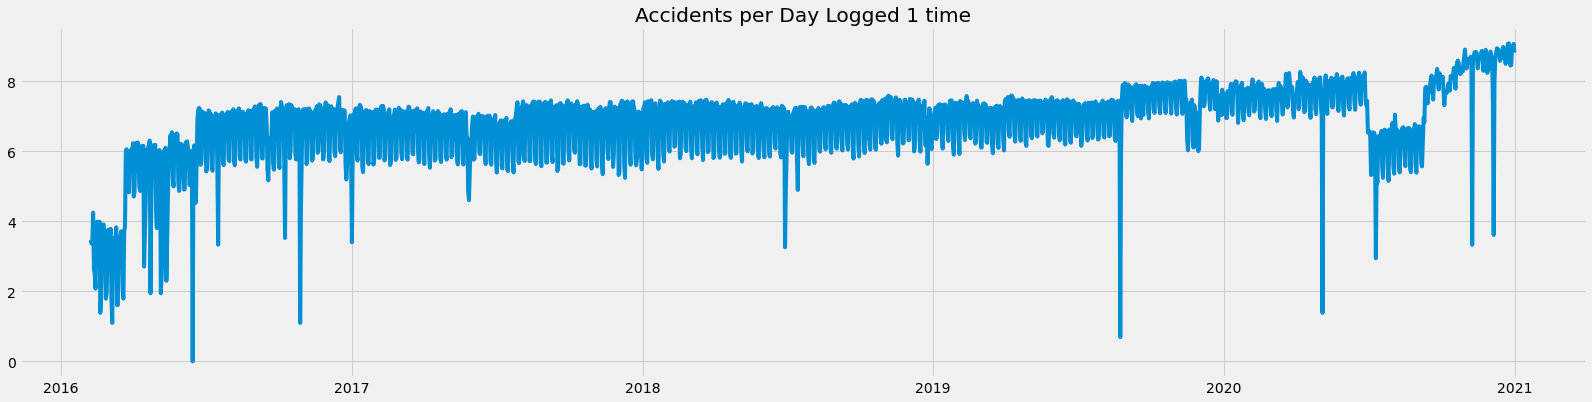

In [55]:
#re plot the data date_count after 1 round of logarithm
plt.figure(figsize = (25,6))
plt.title('Accidents per Day Logged 1 time')

plt.plot(date_count_log1)

In [56]:
#retest dickey fuller after 1 rounds of logging
dickey_fuller(date_count_log1['acdnt_per_day_log'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.548034
p-value                        0.000161
Num of Lags Used              22.000000
Num of Observations Used    1762.000000
Critical Value (1%)           -3.434067
Critical Value (5%)           -2.863182
Critical Value (10%)          -2.567644
dtype: float64


Test statistic of -4.5 is less than all the critical values at 1%(-3.4), 5%(-2.9), and 10% (-2.6)

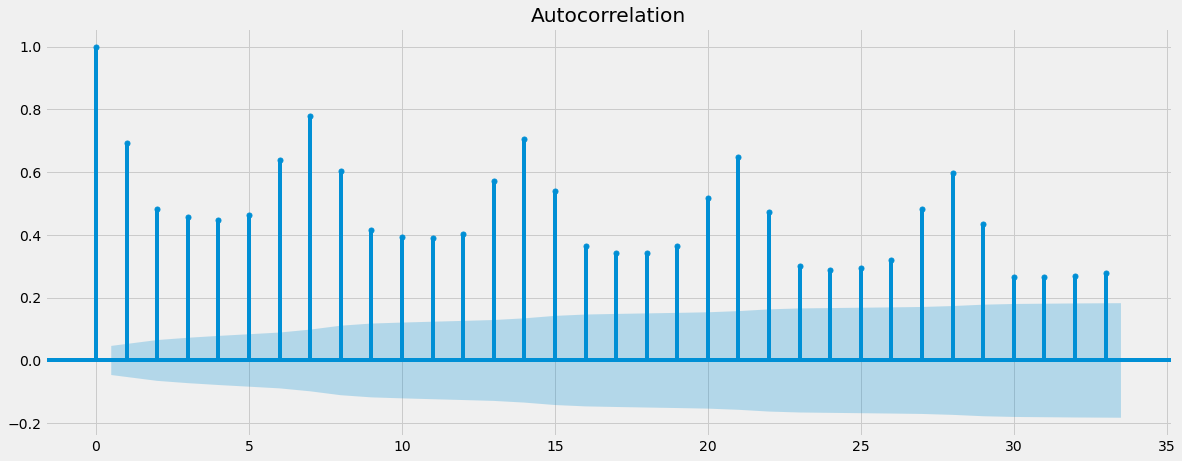

In [57]:
#mapping lag differences to confirm stationarity after 1 round of logging
plot_acf(date_count_log1)
plt.show()

Not a single line inside error bounds.

In [58]:
#will try taking 2nd log value of count of accidents
date_count_log2 = date_count
date_count_log2['acdnt_per_day_log2'] = np.log(date_count['acdnt_per_day_log'])

In [59]:
#drop the extra columns
date_count_log2 = date_count_log2.drop(columns = ['acdnt_per_day','acdnt_per_day_log'])

In [60]:
#replace any infinite values as nan and then drop nan
date_count_log2.replace([np.inf, -np.inf], np.nan, inplace=True)
date_count_log2.dropna(inplace = True)

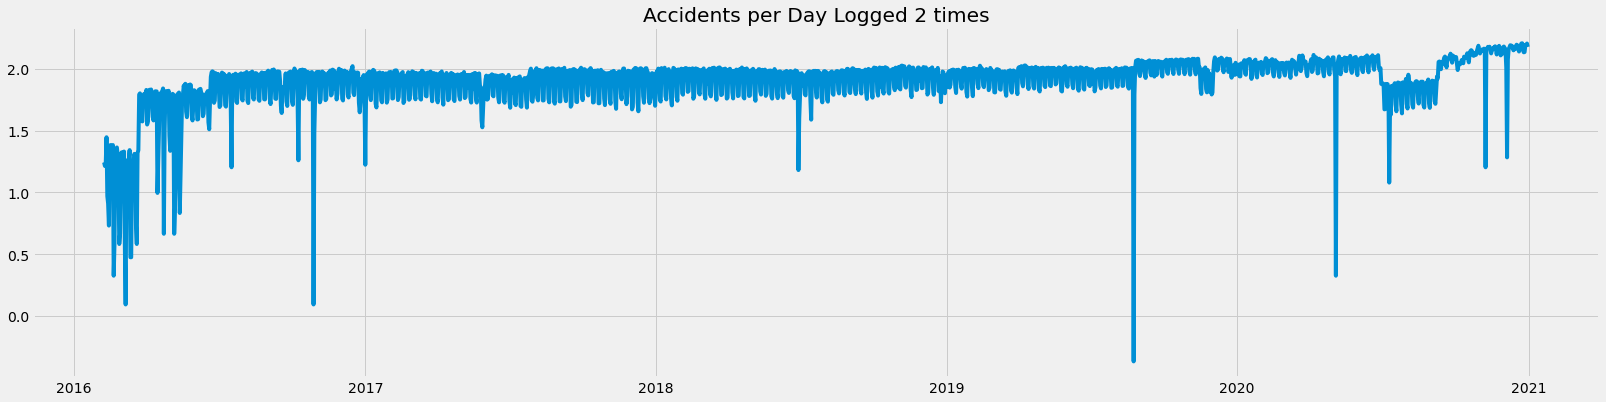

In [61]:
#re plot the data date_count after 2 rounds of nat logarithm
plt.figure(figsize = (25,6))
plt.title('Accidents per Day Logged 2 times')

plt.plot(date_count_log2)

In [62]:
#retest dickey fuller after 2 rounds of logging
dickey_fuller(date_count_log2['acdnt_per_day_log2'])

Dickey-Fuller Stationarity test:
Test Statistic             -5.833744e+00
p-value                     3.920185e-07
Num of Lags Used            2.200000e+01
Num of Observations Used    1.761000e+03
Critical Value (1%)        -3.434069e+00
Critical Value (5%)        -2.863183e+00
Critical Value (10%)       -2.567645e+00
dtype: float64


Test statistic of -5.8 is less than all the critical values at 1%(-3.4), 5%(-2.9), and 10% (-2.6)

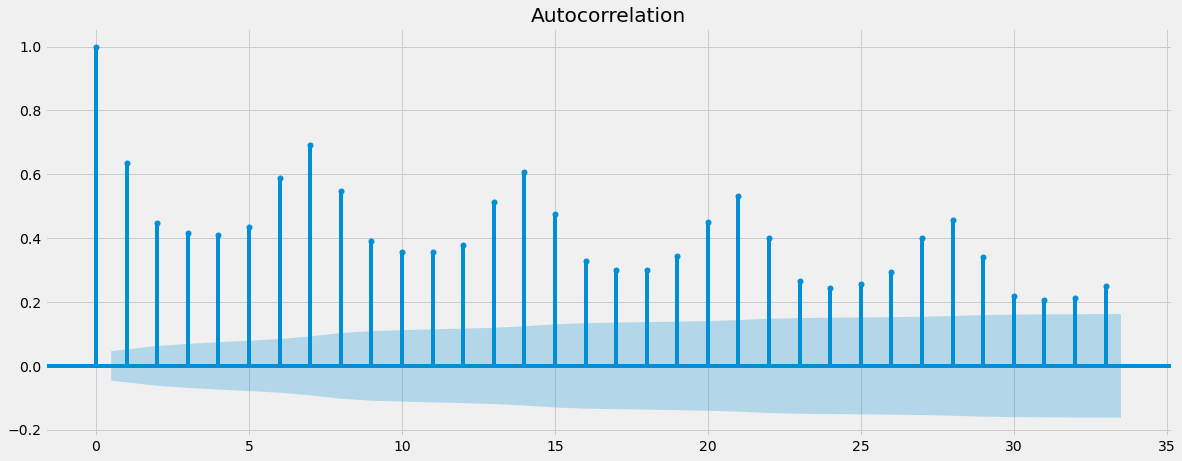

In [63]:
#mapping lag differences to confirm stationarity after 2 rounds of logging
plot_acf(date_count_log2)
plt.show()

Differencing or taking natural logs does look to make the test statistic smaller in the dickey fuller test. However multiple rounds appear to make lags more correlated with each other when testing for auto correlation. 

Becuase of this I will use the dataframe date_count_diff_1 as it had the least amount of autocorrelations outside the confidence intervals.

## 11
bonus:forecasting data

### a) 
Defining parameters

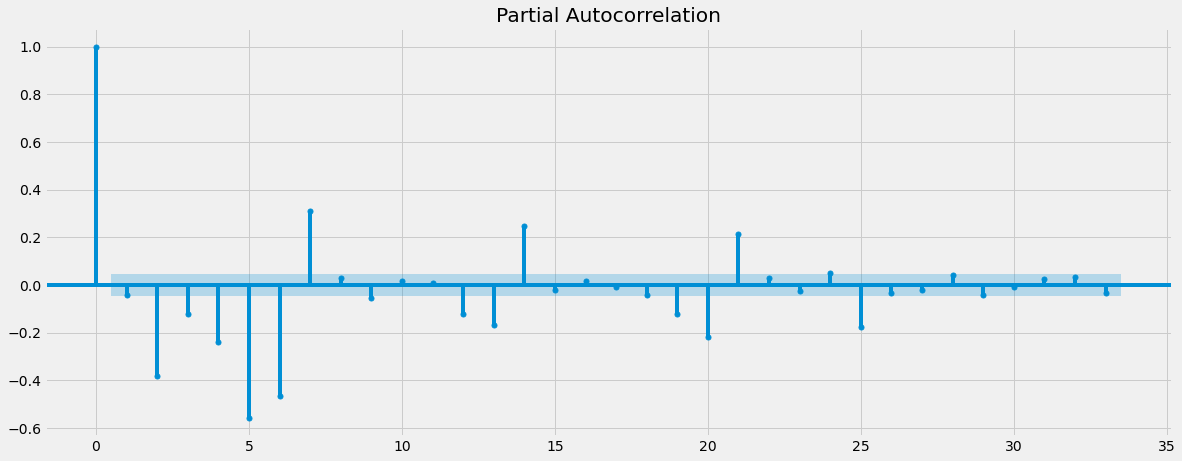

<Figure size 4500x4500 with 0 Axes>

In [64]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(date_count_diff_1)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

largest positive partial auto correlation bar is at 1 so I will choose p = 1

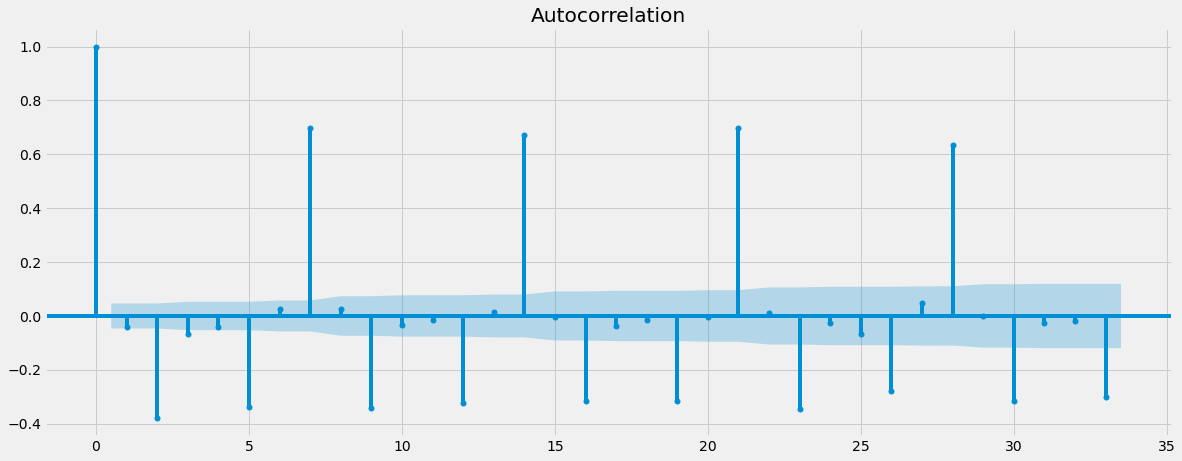

<Figure size 4500x4500 with 0 Axes>

In [65]:
# Plot autocorrelations to determine parameter q

plot_acf(date_count_diff_1)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

Will choose q = 5 as here are 5 positive autocorrelations outside confidence intervals

d = 1 as there was only 1 round of differencing

To start 
p = 1
d = 1
q= 5

### b) 
splitting data

In [66]:
#will look to split data in 2020 just before drop in accidents due to the pandemic

In [67]:
date_count[1590:1615]
#looks to be around 1595

,acdnt_per_day,acdnt_per_day_log,acdnt_per_day_log2
date,,,
2020-06-20,1886,7.542213,2.020516
2020-06-21,1530,7.333023,1.992388
2020-06-22,3381,8.125927,2.095060
2020-06-23,3427,8.139441,2.096721
2020-06-24,3291,8.098947,2.091734
2020-06-25,3410,8.134468,2.096110
2020-06-26,3834,8.251664,2.110415
2020-06-27,1766,7.476472,2.011761
2020-06-28,1502,7.314553,1.989866


In [68]:
#split the original data into training and test data in order to plot to ensure correct values picked
train_orig = date_count['acdnt_per_day'][:1595]
test_orig = date_count['acdnt_per_day'][1594:]

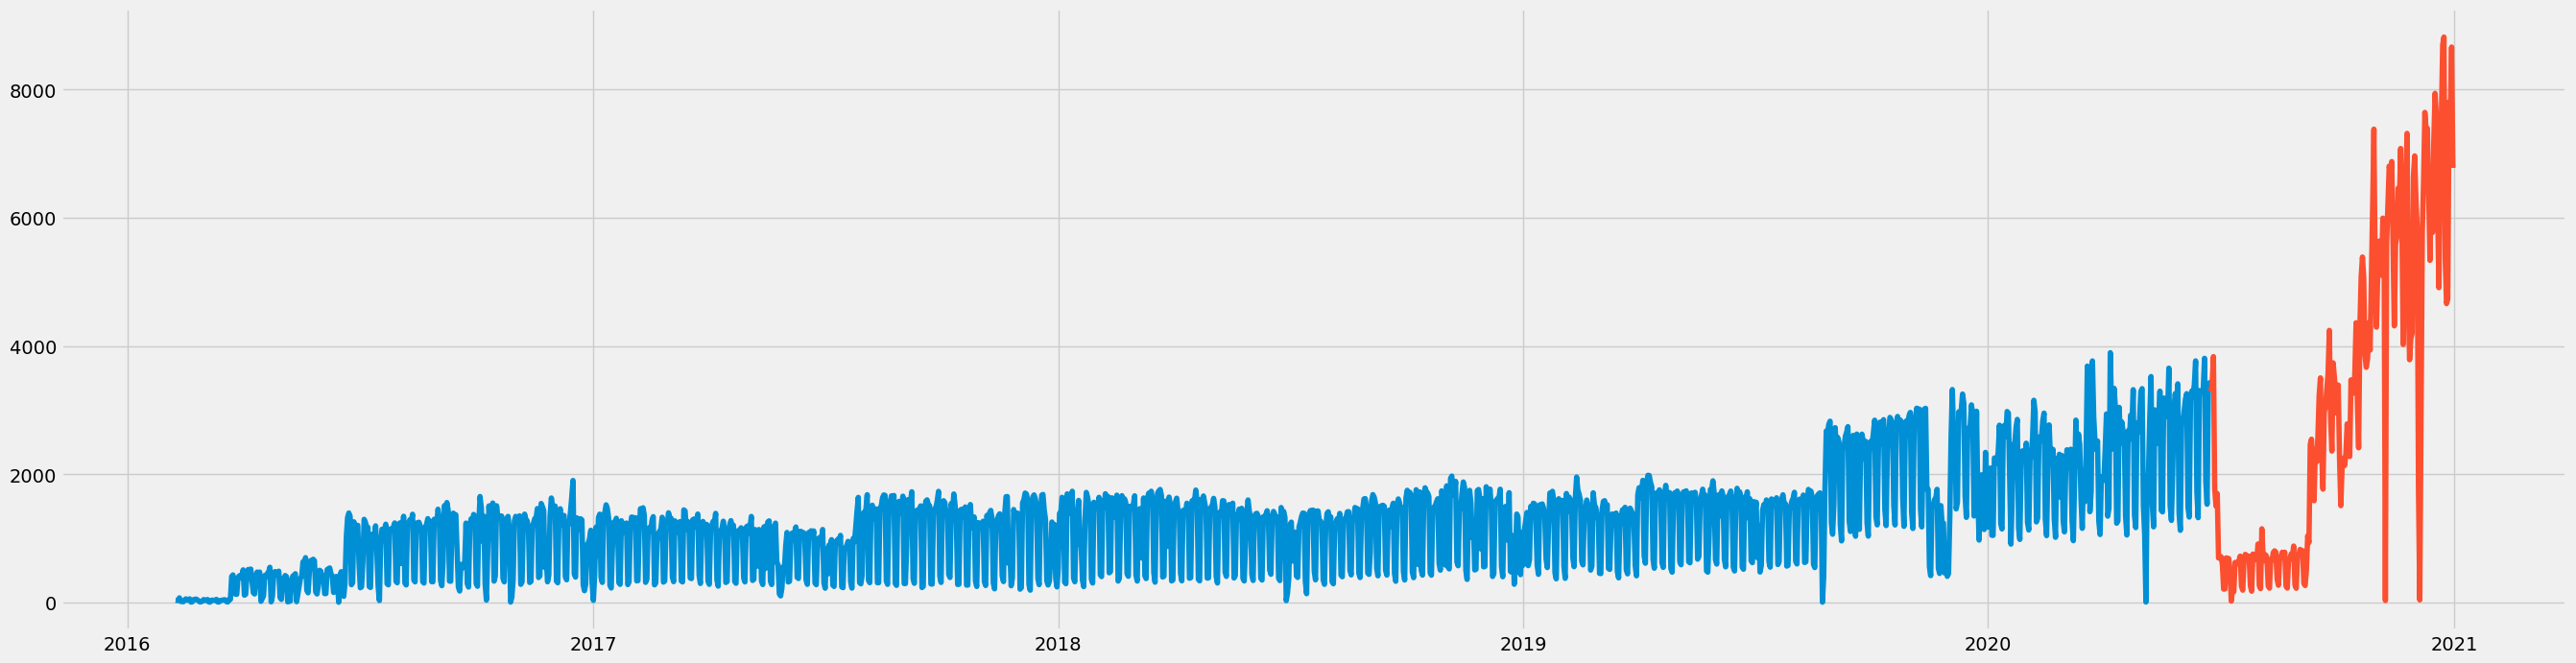

In [69]:
#plot the original data to check when the pandemic drop in accidents occured
plt.figure(figsize=(30,8), dpi =100)
plt.plot(train_orig)
plt.plot(test_orig)

In [70]:
#split the data to be used in the model into training and test data
train = date_count_diff_1['acdnt_per_day'][:1595]
test = date_count_diff_1['acdnt_per_day'][1594:]

In [71]:
test.shape

(190,)

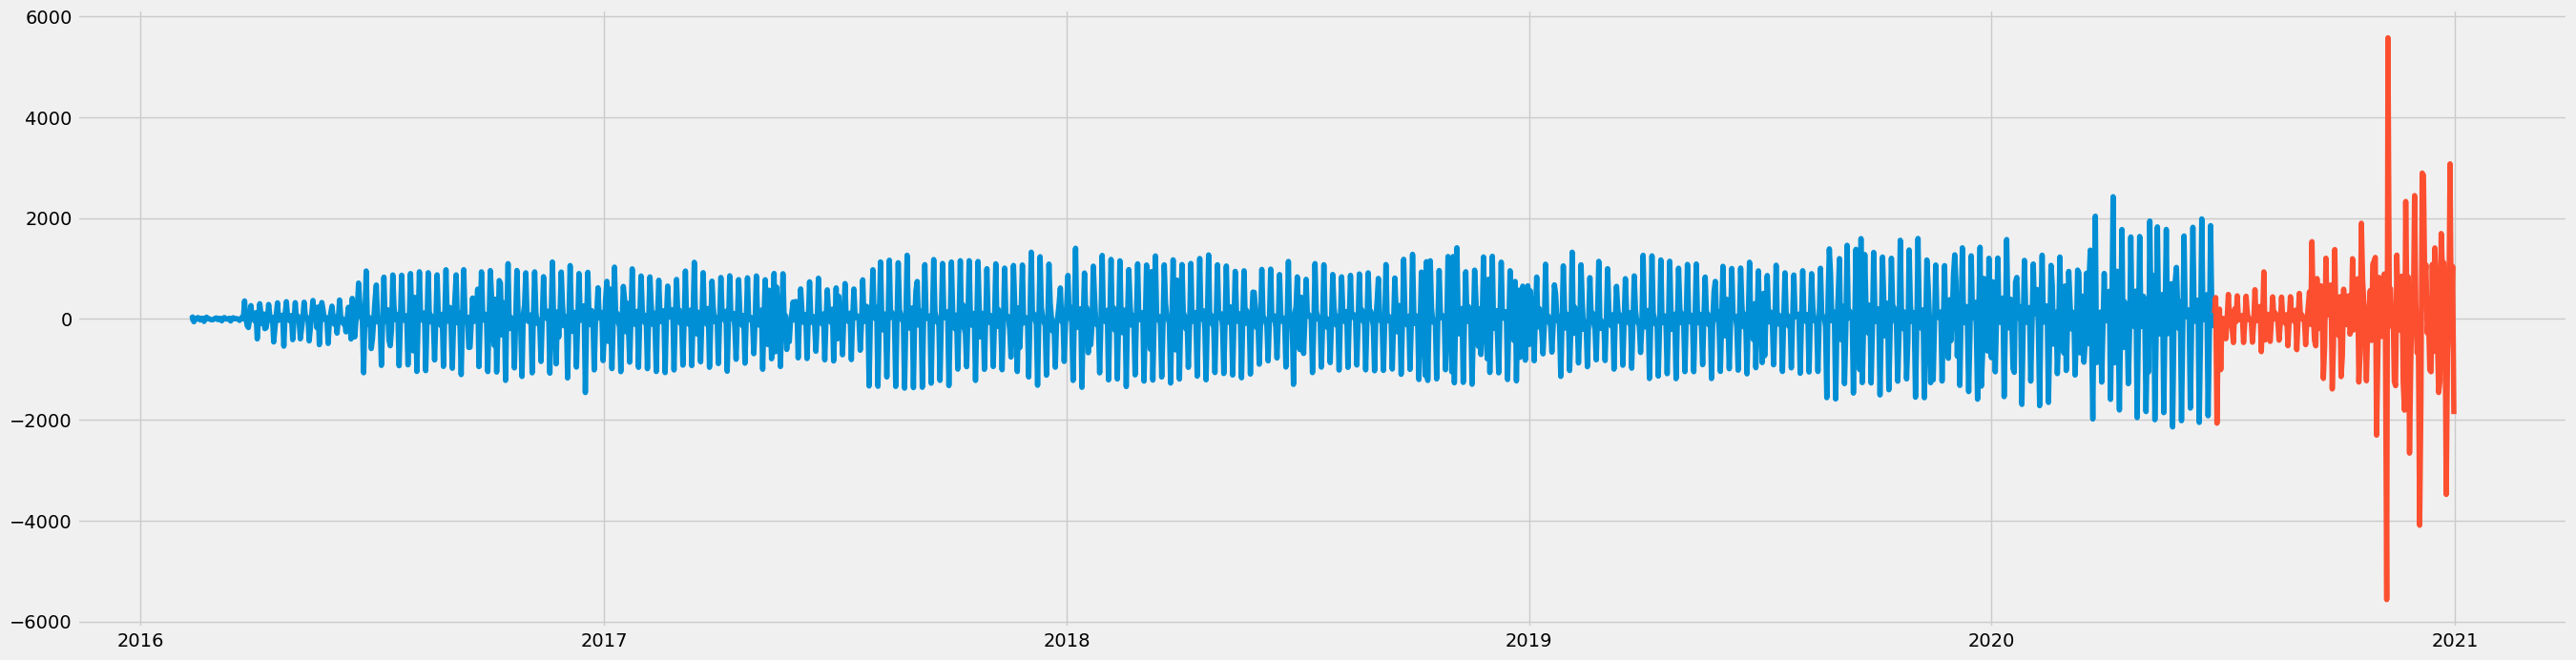

In [72]:
#plot the data to ensure it is split well
plt.figure(figsize=(30,8), dpi=100)
plt.plot(train)
plt.plot(test)

In [73]:
#remove infinites and nan in train and test by making infinite values as nan and then drop nan
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace = True)

test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.dropna(inplace = True)

### c) 
running and testing model
#currently unabel to get model to run

In [74]:
from statsmodels.tsa.api import ARIMA

Still working on getting model below to run

In [ ]:
model = ARIMA(train, order = (1,1,5))
fitted = model.fit()
print(fitted.summary())

#forecast
fc, se, conf = fitted.forecast(190, alpha = 0.05)

#make series for plotting
fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[:, 0], index = test.index)
upper_series = pd.Series(conf[:, 1], index = test.index)

#plot forecast
plt.figure(figsize=(30,8), dpi=100)
plt.plot(train,label = 'train')
plt.plot(test, label = 'real')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = 0.05)
plt.title('Forecast vs Actual')
plt.legend(loc = 'upper left', fontsize = 10)
plt.show()

## 12
exporting data

In [ ]:
#export data
traffic.to_csv(os.path.join(path, 'Prepared', 'v6_data_post_time_analysis.csv'))